In [1]:
%matplotlib notebook

#Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st
from scipy.stats import linregress
import os
import csv

In [2]:
# define variables, lists
# years of data for analysis
year_list = ['2015', '2016', '2017', '2018', '2019', '2022']
test_list = ['2015-2019', '2022'] #For class presentation
# project happiness survey categories
categories = ['Happiness Score', 'Family', 'Health', 'Freedom', 'Perceptions of Corruption', 'Generosity']

## assumption - complete happiness is an overall score of 10 with 1/5 or 2 points being the ideal for each category

In [3]:
# Load combines csv file containing all the data from 2015, 2016, 2017, 2018, 2019 and 2022
combo_data_df = pd.read_csv('Output_data/Happiness_df.csv')

combo_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Freedom (2019),Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.572,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.591,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.592,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.603,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.584,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.352,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.255,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.000,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.349,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127


In [4]:
#Clear out null values. 
combo_data_df.isnull().values.any()

False

In [5]:
# Add Freedom average combined results for 2015-2019, add column

combo_data_df['Freedom (2015-2019)']=((combo_data_df['Freedom (2015)']+
                                       combo_data_df['Freedom (2016)']+
                                       combo_data_df['Freedom (2017)']+
                                       combo_data_df['Freedom (2018)']+
                                       combo_data_df['Freedom (2019)']
                                                    )/5)
#Display happiness scores_df.
combo_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Perceptions of Corruption (2019),Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022),Freedom (2015-2019)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.343,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147,0.620642
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.118,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270,0.618035
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.410,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188,0.625959
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.341,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217,0.638049
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.308,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217,0.610954
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.090,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149,0.428399
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.113,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186,0.324000
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.025,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089,0.117924
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.082,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127,0.419387


In [6]:
# Get average Overall Happiness scores for 2015-2019, add column.

combo_data_df['Overall Happiness (2015-2019)']=((combo_data_df['Happiness Score (2015)']+
                                       combo_data_df['Happiness Score (2016)']+
                                       combo_data_df['Happiness Score (2017)']+
                                       combo_data_df['Happiness Score (2018)']+
                                       combo_data_df['Happiness Score (2019)']
                                                    )/5)
#Display happiness scores_df.
combo_data_df

,Index,Country,Rank (2015),Happiness Score (2015),Family (2015),Health (2015),Freedom (2015),Perceptions of Corruption (2015),Generosity (2015),Rank (2016),...,Generosity (2019),Rank (2022),Happiness Score (2022),Family (2022),Health (2022),Freedom (2022),Perceptions of Corruption (2022),Generosity (2022),Freedom (2015-2019),Overall Happiness (2015-2019)
0,0,Switzerland,1.0,7.587,1.34951,0.94143,0.66557,0.41978,0.29678,2.0,...,0.263,4.0,7.512,1.226,0.822,0.677,0.461,0.147,0.620642,7.5114
1,1,Iceland,2.0,7.561,1.40223,0.94784,0.62877,0.14145,0.43630,3.0,...,0.354,3.0,7.557,1.320,0.803,0.718,0.191,0.270,0.618035,7.5110
2,2,Denmark,3.0,7.527,1.36058,0.87464,0.64938,0.48357,0.34139,1.0,...,0.252,2.0,7.636,1.243,0.777,0.719,0.532,0.188,0.625959,7.5460
3,3,Norway,4.0,7.522,1.33095,0.88521,0.66973,0.36503,0.34699,4.0,...,0.271,8.0,7.365,1.239,0.786,0.728,0.474,0.217,0.638049,7.5410
4,4,Canada,5.0,7.427,1.32261,0.90563,0.63297,0.32957,0.45811,6.0,...,0.285,15.0,7.025,1.188,0.783,0.659,0.368,0.217,0.610954,7.3506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
111,132,Ivory Coast,151.0,3.655,0.77115,0.15185,0.46866,0.17922,0.20165,139.0,...,0.154,88.0,5.235,0.442,0.322,0.451,0.124,0.149,0.428399,4.2732
112,133,Burkina Faso,152.0,3.587,0.85188,0.27125,0.39493,0.12832,0.21747,145.0,...,0.177,113.0,4.670,0.565,0.320,0.382,0.126,0.186,0.324000,4.0738
113,134,Afghanistan,153.0,3.575,0.30285,0.30335,0.23414,0.09719,0.36510,154.0,...,0.158,146.0,2.404,0.000,0.289,0.000,0.005,0.089,0.117924,3.5128
114,136,Benin,155.0,3.340,0.35386,0.31910,0.48450,0.08010,0.18260,153.0,...,0.175,115.0,4.623,0.064,0.335,0.479,0.230,0.127,0.419387,3.9010


<IPython.core.display.Javascript object>


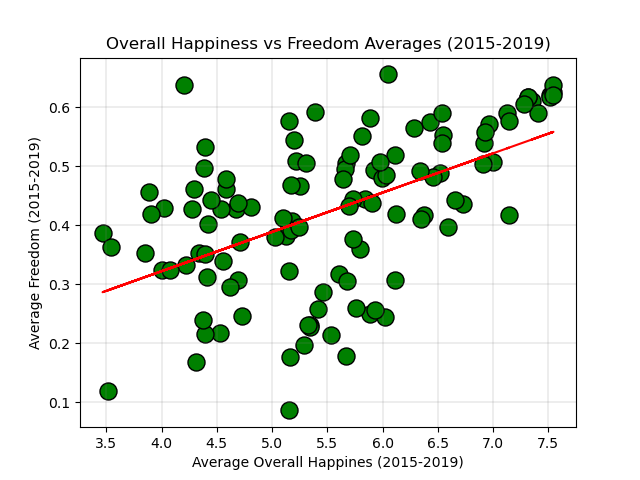

The r-value is: 0.286 and the pvalue is: 0.0


In [13]:
# Create Scatter Plots of Freedom vs Overall Happiness

#Define x and y axis.
#x = 'Overall Happiness (2015-2019)'
#y = 'Freedom (2015-2019)'

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = "+ str(round(slope,4)) + "x +" + str(round(intercept,4))
    plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Green')
    plt.plot(x_values, regress_values, "r-")
    print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
    plt.annotate(line_equation, (5.8,0.8), fontsize=15, color="green")
    return line_equation
          
#Plot the data.
avg_countries = linear_regression(combo_data_df["Overall Happiness (2015-2019)"], combo_data_df["Freedom (2015-2019)"])
plt.title("Overall Happiness vs Freedom Averages (2015-2019)")
plt.xlabel("Average Overall Happines (2015-2019)")
plt.ylabel("Average Freedom (2015-2019)")
plt.grid(color='gray', linestyle='-', linewidth=0.2)
#plt.show()

plt.savefig(f'Images/Freedom1.png')

    


<IPython.core.display.Javascript object>


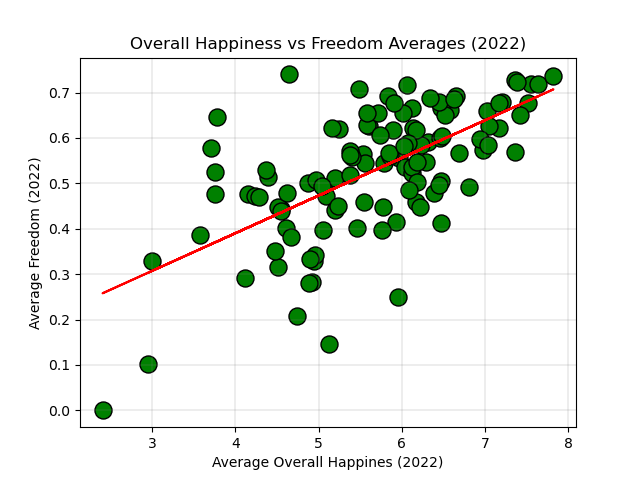

The r-value is: 0.41 and the pvalue is: 0.0


In [14]:
# Create Scatter Plots of Freedom vs Overall Happiness for 2022

#Define x and y axis.
x_values = combo_data_df["Happiness Score (2022)"].mean()
y_values = combo_data_df["Freedom (2022)"].mean()

def linear_regression(x_values, y_values):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_equation = "y = "+ str(round(slope,4)) + "x +" + str(round(intercept,4))
    plt.scatter(x_values, y_values, s=150, marker='o', edgecolors='Black', c='Green')
    plt.plot(x_values, regress_values, "r-")
    print(f'The r-value is: {round(rvalue**2,3)} and the pvalue is: {round(pvalue**2,3)}')
    plt.annotate(line_equation, (5.8,0.8), fontsize=15, color="green")
    return line_equation
          
#Plot the data.
avg_countries = linear_regression(combo_data_df["Happiness Score (2022)"], combo_data_df["Freedom (2022)"])
plt.title("Overall Happiness vs Freedom Averages (2022)")
plt.xlabel("Average Overall Happines (2022)")
plt.ylabel("Average Freedom (2022)")
plt.grid(color='gray', linestyle='-', linewidth=0.2)
plt.show()

plt.savefig(f'Images/Freedom2.png')
        
